회귀(regression)는 머신러닝에서 가장 기초적인 데이터 분석방법 중 하나임

회귀='되돌아오다'; 머신러닝에서의 회귀란 가격이나 확률처럼 연속된 실수값을 정확히 예측하는 것이 목적임

선형회귀(linear regression): 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것. 선형회귀에서 주로 사용되는 2차원에서의 직선이란 기울기와 y절편을 갖는 좌표평면 위 점들의 집합이다.

선형회귀 이용 시 국어와 수학 성적, 키와 몸무게, 치킨과 맥주 판매량 등 2개의 데이터에 대한 경향성을 예측할 수 있다. 

Text(0, 0.5, 'Elderly Population Rate')

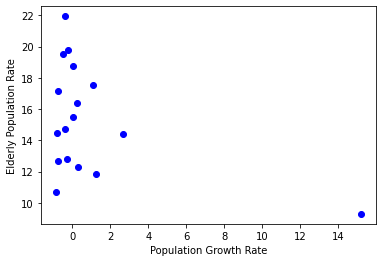

In [2]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37,
                  -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo') #x절편, y절편, 표기형식
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')

맨 오른쪽에 나타난 점을 다른 점들보다 큰 gap을 가지므로 극단치라 한다

Text(0, 0.5, 'Elderly Population Rate')

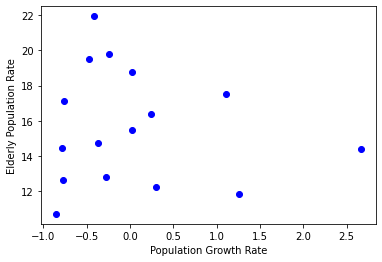

In [5]:
#극단치를 제거
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37,
                  -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc= population_inc[:5]+ population_inc[6:]
X = population_inc
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old= population_old[:5]+ population_old[6:]
Y = population_old

plt.plot(population_inc, population_old, 'bo') #x데이터, y데이터, 표기형식
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')

![최소제곱법](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F995D9F505C66F17105)

a: -0.355834147915461 b: 15.669317743971302


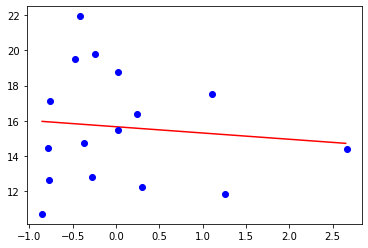

In [12]:
#데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차(residual)라 한다.
#이런 잔차의 제곱을 최소화하는 알고리즘을 최소제곱법(least square method)라고 한다
#LSM으로 직선 y=ax+b의 a(기울기)와 b(y절편)를 구할 수 있다
import numpy as np

#X와 Y의 평균 구하기
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

#최소제곱법으로 a와 b를 구한다
#2개 이상의 리스트를 하나로 묶는 zip을 사용한다
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

#그래프를 그리기 위해 회귀선의 x, y데이터를 구한다
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x + b #직선방정식 (a는 기울기, b는 y절)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

X값이 증가할수록 Y값은 감소한다. 즉, 인구증가율이 증가하면 고령인구비율은 감소하고, 반대로 인구증가율이 감소하면 고령인구비율은 증가할 것이다 (음의 상관관계)

0 a: 0.18293011 b: 0.3704319 loss: 243.35501
100 a: 0.12183596 b: 6.735452 loss: 89.40964
200 a: -0.11822335 b: 11.209128 loss: 29.627949
300 a: -0.25692022 b: 13.812338 loss: 13.22118
400 a: -0.32196912 b: 15.033538 loss: 10.184082
500 a: -0.34634656 b: 15.4911995 loss: 9.812456
600 a: -0.35366854 b: 15.628657 loss: 9.782453
700 a: -0.3554342 b: 15.661813 loss: 9.780859
800 a: -0.35577527 b: 15.668212 loss: 9.780804
900 a: -0.35582688 b: 15.66919 loss: 9.780804


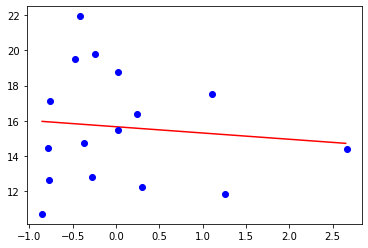

In [20]:
import tensorflow as tf
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a*X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

#적당한 학습률을 넣으면 Adam은 안정적이고 효율적으로 학습함.(보통 0.1~0.0001사이 값)
optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
  #잔차의 제곱의 평균을 최소화
  optimizer.minimize(compute_loss, var_list=[a,b]) #최소화할 손실을 전달, var_list엔 학습시킬 변수리스트를 전달
  #1000번의 학습을 거쳐 a와 b는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달함

  if i % 100 == 0:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

error구할 때 기대출력에서 실제출력을 뺐는데, 여기서도 기대출력인 Y에서 실제출력인 y_pred를 빼는데 이를 잔차(residual)라고 한다. 이 잔차의 제곱을 모두 더해서 평균낸 값을 loss로 반환한다.(그냥 더하지 않고 제곱한 후 더하는 이유는 잔차로 양수와 음수가 모두 나올 수 있기 때문에 각 잔차의 크기를 모두 보존하기 위해서임. 크기를 보존하기 위해 제곱이 아닌 절댓값을 사용하는 법도 있고 제곱해서 더한 뒤 다시 제곱근을 만드는 방법도 있다.

손실을 최소화하는 것이 딥러닝을 포함한 머신러닝의 주요 알고리즘이다. 최적화 함수(optimizer)는 이 과정(복잡한 미분 계산 및 가중치 업데이트)을 자동을 진행해준다.